# **California Housing Price Prediction**

---






























Importing python packages and dataset from kaggle

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
import seaborn as sns
import missingno as msno 
import io
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
style.use('ggplot')

In [4]:
from google.colab import files
uploaded = files.upload()


Saving train (4).csv to train (4).csv


In [5]:
for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))
  

User uploaded file "train (4).csv" with length 460676 bytes


In [6]:
uploaded

{'train (4).csv': b'Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice\n1,60,RL,65,8450,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,

In [0]:
train_ds=pd.read_csv(io.StringIO(uploaded['train (4).csv'].decode('utf-8')),index_col='Id')

In [8]:
print(train_ds)

      MSSubClass MSZoning  LotFrontage  ...  SaleType SaleCondition SalePrice
Id                                      ...                                  
1             60       RL         65.0  ...        WD        Normal    208500
2             20       RL         80.0  ...        WD        Normal    181500
3             60       RL         68.0  ...        WD        Normal    223500
4             70       RL         60.0  ...        WD       Abnorml    140000
5             60       RL         84.0  ...        WD        Normal    250000
...          ...      ...          ...  ...       ...           ...       ...
1456          60       RL         62.0  ...        WD        Normal    175000
1457          20       RL         85.0  ...        WD        Normal    210000
1458          70       RL         66.0  ...        WD        Normal    266500
1459          20       RL         68.0  ...        WD        Normal    142125
1460          20       RL         75.0  ...        WD        Nor

In [9]:
from google.colab import files
uploaded = files.upload()

Saving test (1).csv to test (1).csv


In [11]:
for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

User uploaded file "test (1).csv" with length 451405 bytes


In [12]:
uploaded

{'test (1).csv': b'Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition\n1461,20,RH,80,11622,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0,T

In [0]:
test_ds=pd.read_csv(io.StringIO(uploaded['test (1).csv'].decode('utf-8')),index_col='Id')

In [14]:
print(test_ds)

      MSSubClass MSZoning  LotFrontage  ...  YrSold SaleType SaleCondition
Id                                      ...                               
1461          20       RH         80.0  ...    2010       WD        Normal
1462          20       RL         81.0  ...    2010       WD        Normal
1463          60       RL         74.0  ...    2010       WD        Normal
1464          60       RL         78.0  ...    2010       WD        Normal
1465         120       RL         43.0  ...    2010       WD        Normal
...          ...      ...          ...  ...     ...      ...           ...
2915         160       RM         21.0  ...    2006       WD        Normal
2916         160       RM         21.0  ...    2006       WD       Abnorml
2917          20       RL        160.0  ...    2006       WD       Abnorml
2918          85       RL         62.0  ...    2006       WD        Normal
2919          60       RL         74.0  ...    2006       WD        Normal

[1459 rows x 79 columns]

In [0]:
tt=pd.concat([train_ds,test_ds],axis=0,sort=False)

In [16]:
tt.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2919 entries, 1 to 2919
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     2919 non-null   int64  
 1   MSZoning       2915 non-null   object 
 2   LotFrontage    2433 non-null   float64
 3   LotArea        2919 non-null   int64  
 4   Street         2919 non-null   object 
 5   Alley          198 non-null    object 
 6   LotShape       2919 non-null   object 
 7   LandContour    2919 non-null   object 
 8   Utilities      2917 non-null   object 
 9   LotConfig      2919 non-null   object 
 10  LandSlope      2919 non-null   object 
 11  Neighborhood   2919 non-null   object 
 12  Condition1     2919 non-null   object 
 13  Condition2     2919 non-null   object 
 14  BldgType       2919 non-null   object 
 15  HouseStyle     2919 non-null   object 
 16  OverallQual    2919 non-null   int64  
 17  OverallCond    2919 non-null   int64  
 18  YearBuil



---



#**DATA MUNGING**

---



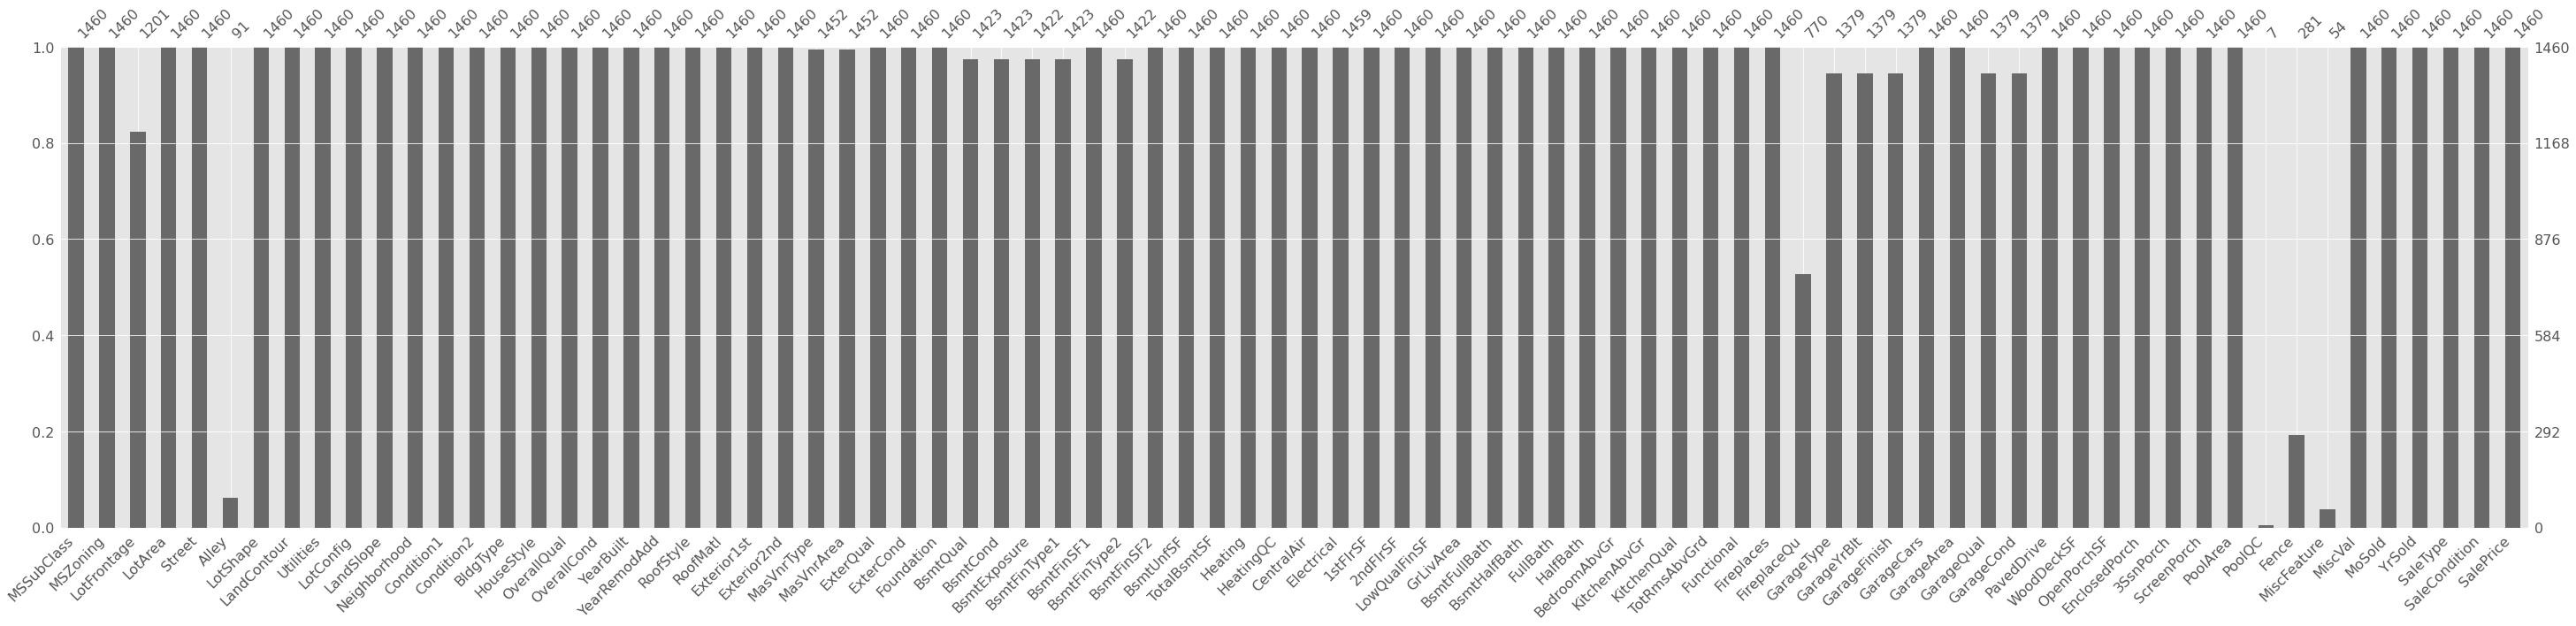

In [17]:
msno.bar(train_ds,labels=True,figsize=(50, 10))

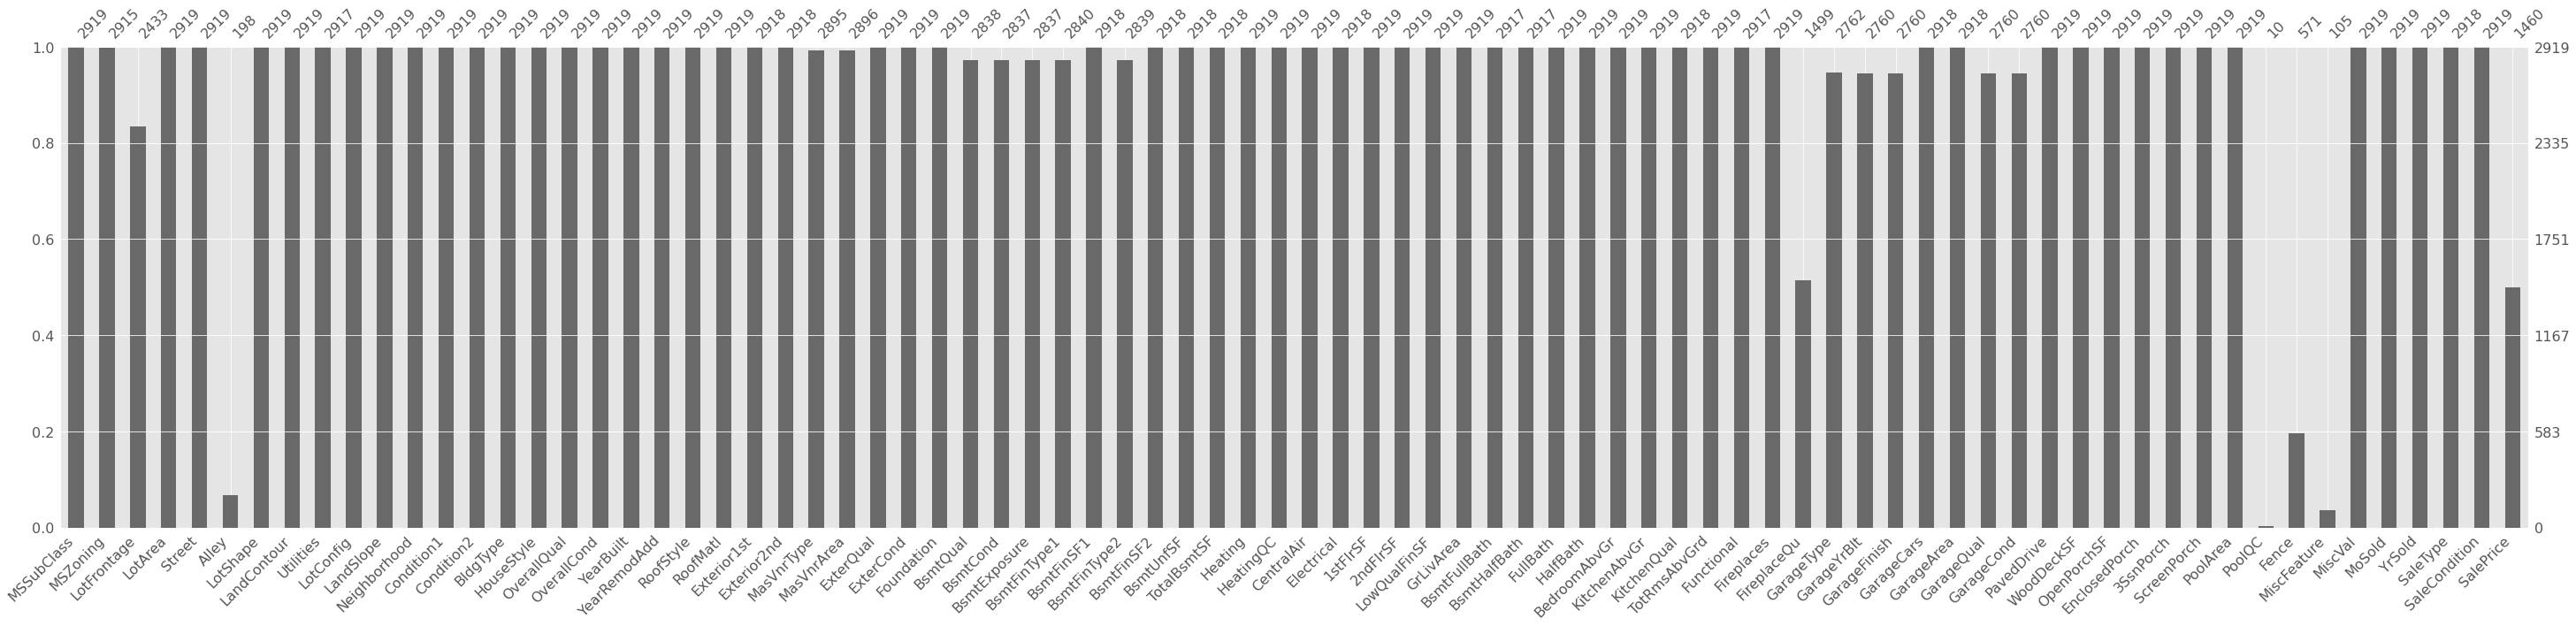

In [18]:
msno.bar(tt,labels=True,figsize=(50, 10))

Alley,PoolQC, fence and misc features have a lot of missing values , hence can be neglected.

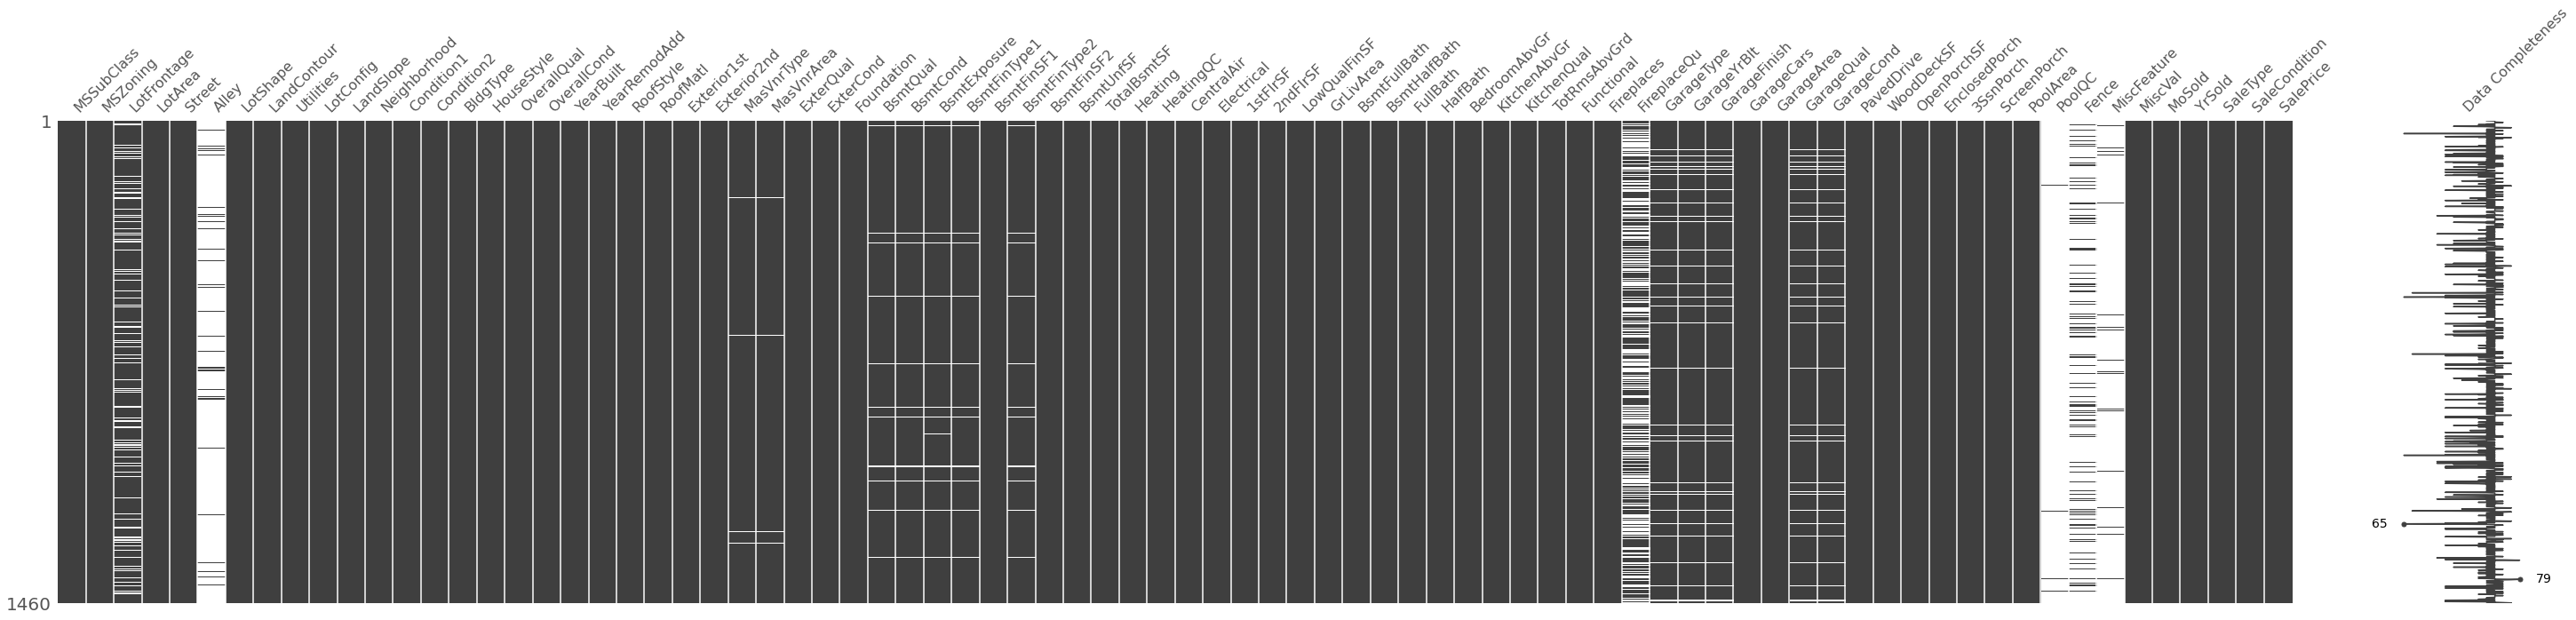

In [19]:
msno.matrix(train_ds,labels=True,figsize=(50, 10))

BsmlX, MansVarX, GarageX  variables describe similar type of pattern in missing values.

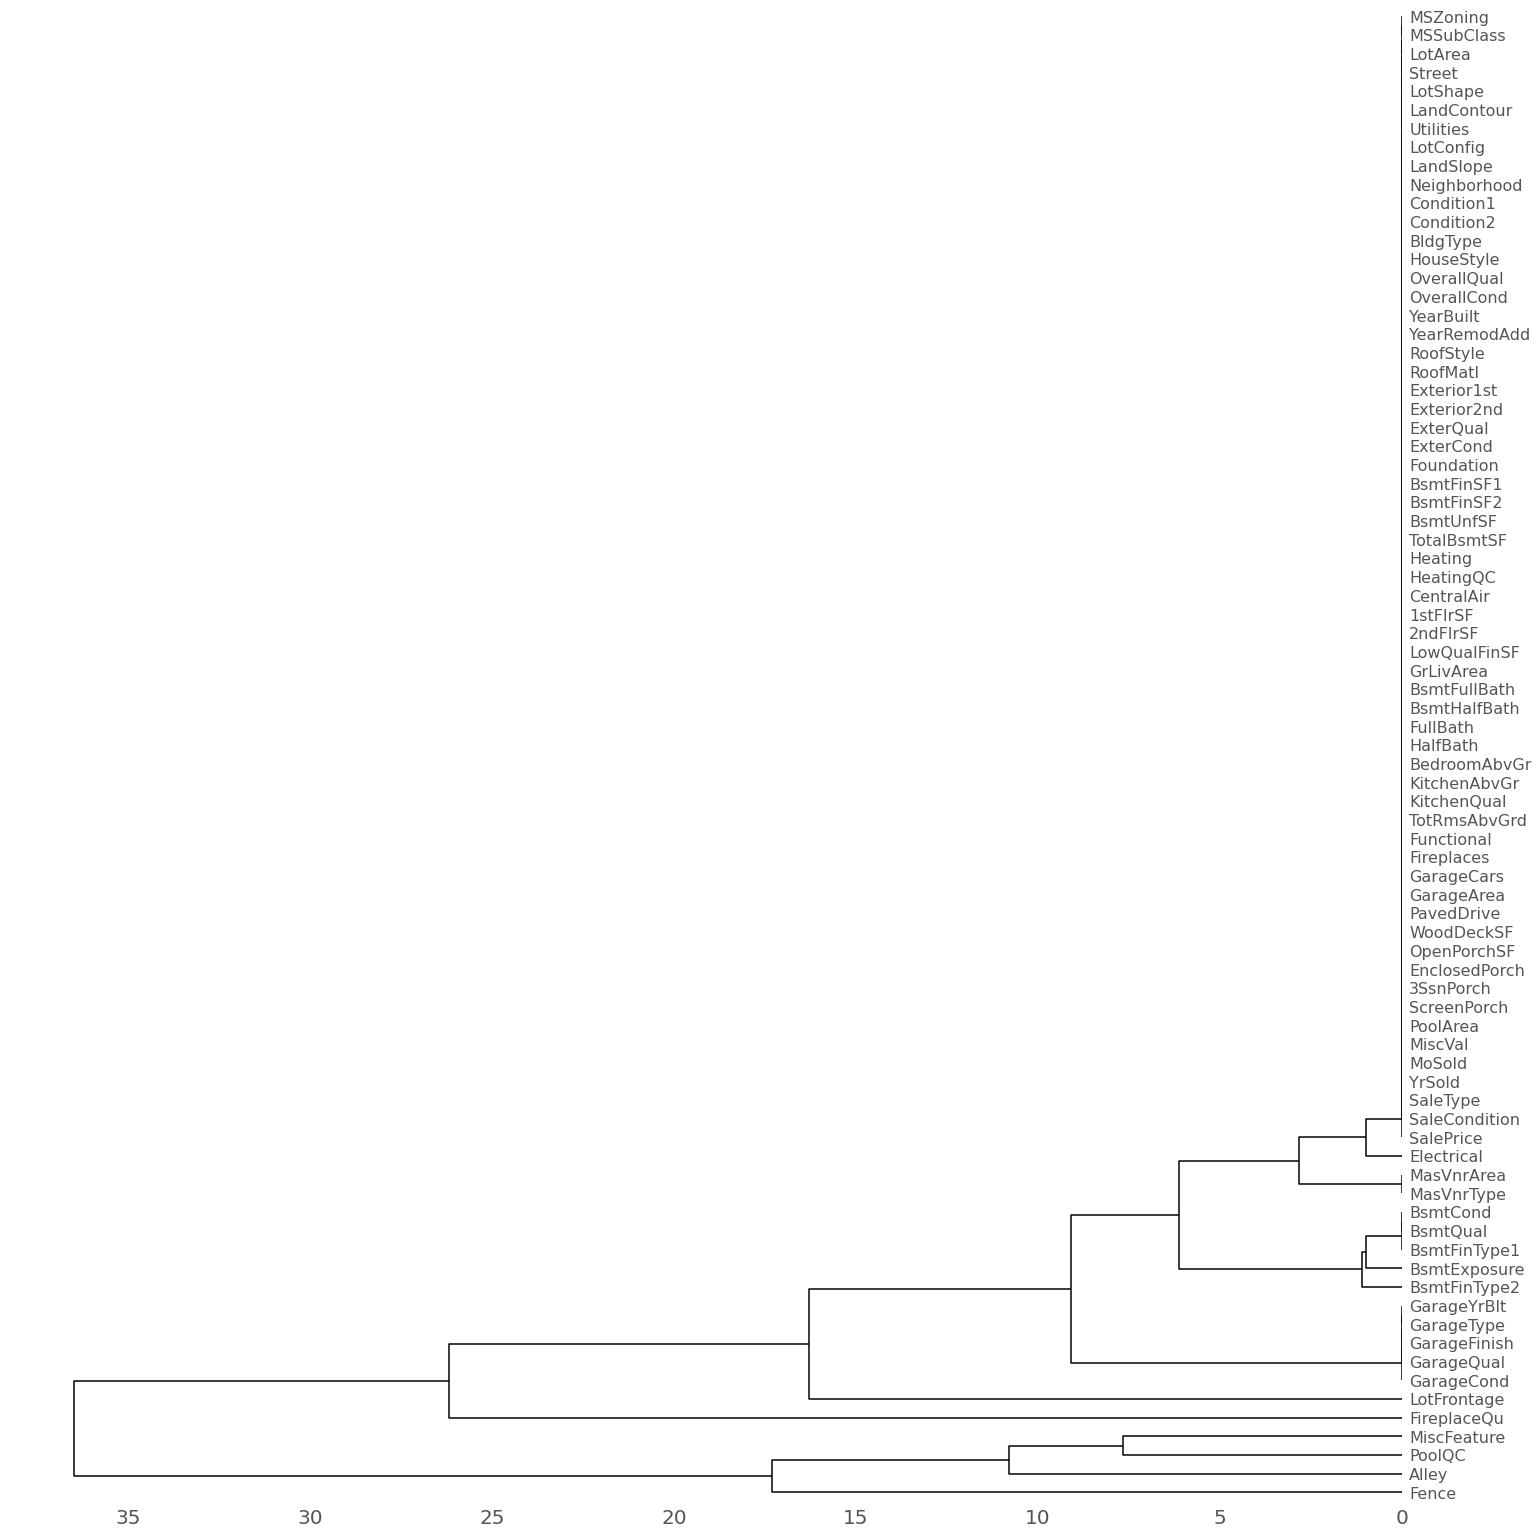

In [20]:
msno.dendrogram(train_ds)

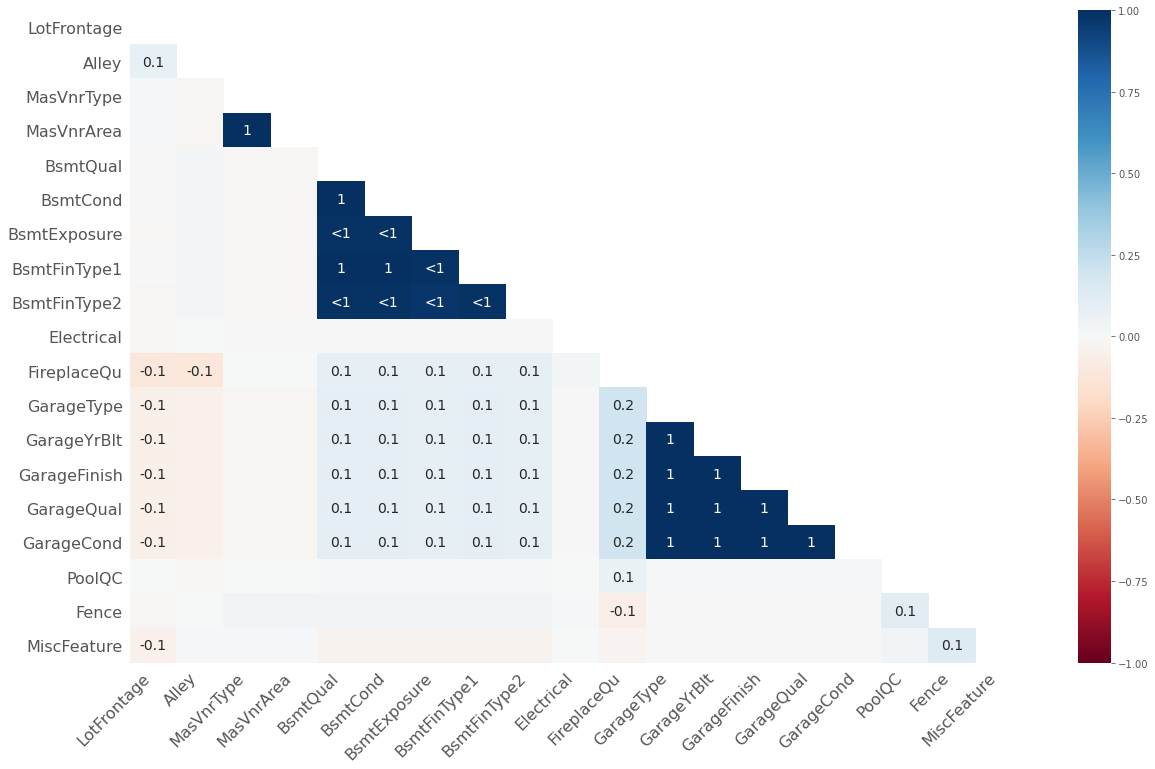

In [21]:
msno.heatmap(train_ds) 

A value near -1 means if one variable appears then the other variable is very likely to be missing.<br>
A value near 0 means there is no dependence between the occurrence of missing values of two variables.<br>
A value near 1 means if one variable appears then the other variable is very likely to be present.<br>

**Conclusions: Arranging missing values in acsending order** 

---



*   Electrical=1 missing value <br>
*   Missing value<50




> 1.  MasVnrType  
2. MasVnrArea  
3. BsmtCond
4. BsmtFinType1  
5.BsmtQual 
6.BsmtFinType2
7.BsmtExposure


*  Missing value <100


> 1. GarageType
2. GarageYrBlt
3.GarageFinish
4.GarageQual
5.GarageCond 

*   Missing value <300


> 1.  LotFrontage    





























In [0]:
train_ds['SalePrice per unit area']=train_ds['SalePrice']/train_ds['LotArea']

In [23]:
train_ds.head(20)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,...,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,SalePrice per unit area
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,...,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500,24.674556
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,...,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500,18.906250
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,...,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500,19.866667
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,...,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000,14.659686
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,...,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000,17.531557
6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1.5Fin,5,5,1993,1995,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,Wood,Gd,TA,No,GLQ,732,Unf,0,64,796,GasA,Ex,...,SBrkr,796,566,0,1362,1,0,1,1,1,1,TA,5,Typ,0,NaN,Attchd,1993.0,Unf,2,480,TA,TA,Y,40,30,0,320,0,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000,10.131066
7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,1Fam,1Story,8,5,2004,2005,Gable,CompShg,VinylSd,VinylSd,Stone,186.0,Gd,TA,PConc,Ex,TA,Av,GLQ,1369,Unf,0,317,1686,GasA,Ex,...,SBrkr,1694,0,0,1694,1,0,2,0,3,1,Gd,7,Typ,1,Gd,Attchd,2004.0,RFn,2,636,TA,TA,Y,255,57,0,0,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000,30.444268
8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NWAmes,PosN,Norm,1Fam,2Story,7,6,1973,1973,Gable,CompShg,HdBoard,HdBoard,Stone,240.0,TA,TA,CBlock,Gd,TA,Mn,ALQ,859,BLQ,32,216,1107,GasA,Ex,...,SBrkr,1107,983,0,2090,1,0,2,1,3,1,TA,7,Typ,2,TA,Attchd,1973.0,RFn,2,484,TA,TA,Y,235,204,228,0,0,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000,19.264111
9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Artery,Norm,1Fam,1.5Fin,7,5,1931,1950,Gable,CompShg,BrkFace,Wd Shng,None,0.0,TA,TA,BrkTil,TA,TA,No,Unf,0,Unf,0,952,952,GasA,Gd,...,FuseF,1022,752,0,1774,0,0,2,0,2,2,TA,8,Min1,2,TA,Detchd,1931.0,Unf,2,468,Fa,TA,Y,90,0,205,0,0,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900,21.225490


In [24]:
train_ds['SalePrice per unit area'].min()

1.3904409085388072

In [25]:
train_ds['SalePrice per unit area'].max()

95.38461538461539

#**Corelation matrix**

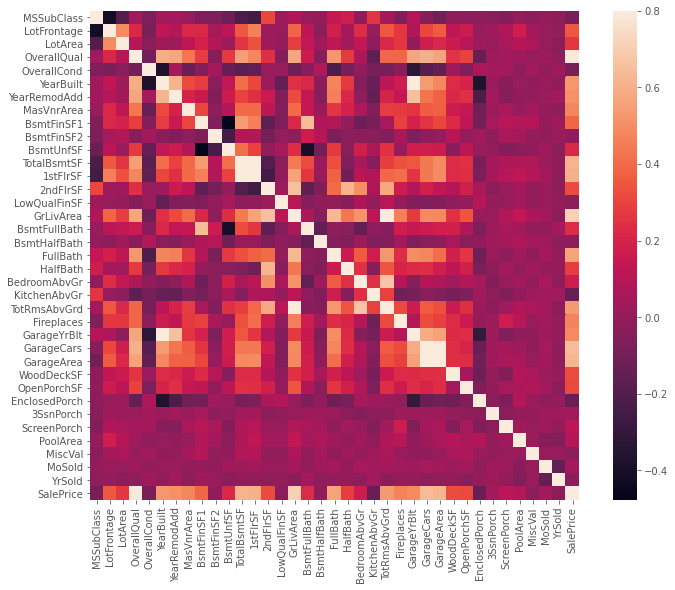

In [26]:
corrmat =tt.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);


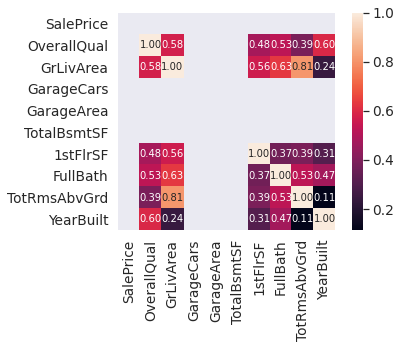

In [27]:
#saleprice correlation matrix
k = 10 #number of variables for heatmap
cols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(tt[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

DETECTED top 10 features that are realted to sales price.<br>
Garage value and Garage area are the same.<br>
TotalBsmtSF and 1stFlrSF are the same.

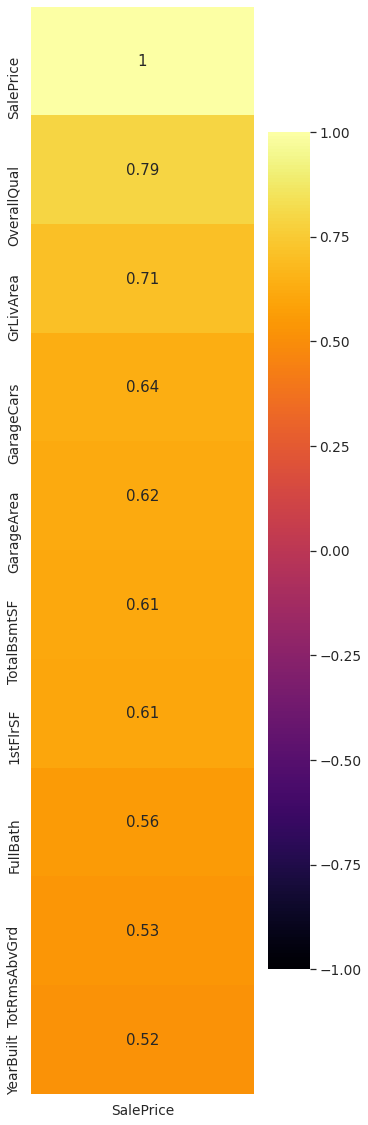

In [28]:
corr_new_tt=tt.corr()
plt.figure(figsize=(5,20))
sns.heatmap(corr_new_tt[['SalePrice']].sort_values(by=['SalePrice'],ascending=False).head(10),vmin=-1, cmap="inferno", annot=True)

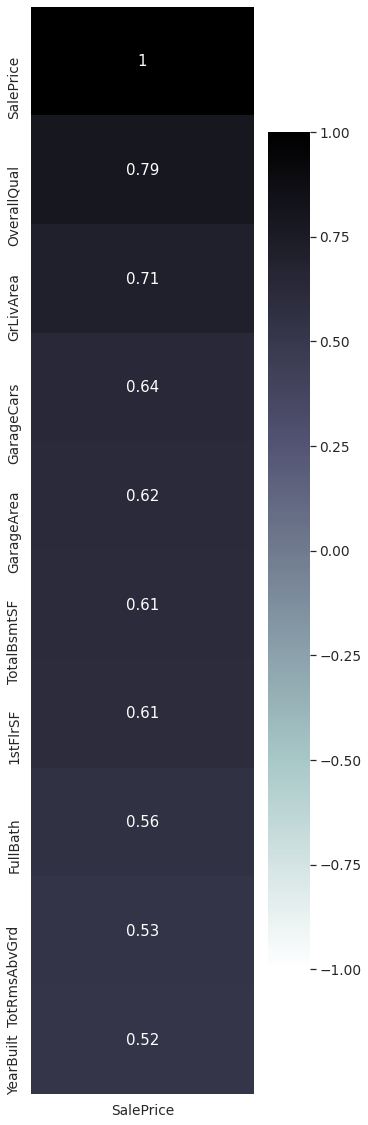

In [29]:
corr_new_train_ds=train_ds.corr()
plt.figure(figsize=(5,20))
sns.heatmap(corr_new_train_ds[['SalePrice']].sort_values(by=['SalePrice'],ascending=False).head(10),vmin=-1, cmap="bone_r", annot=True)

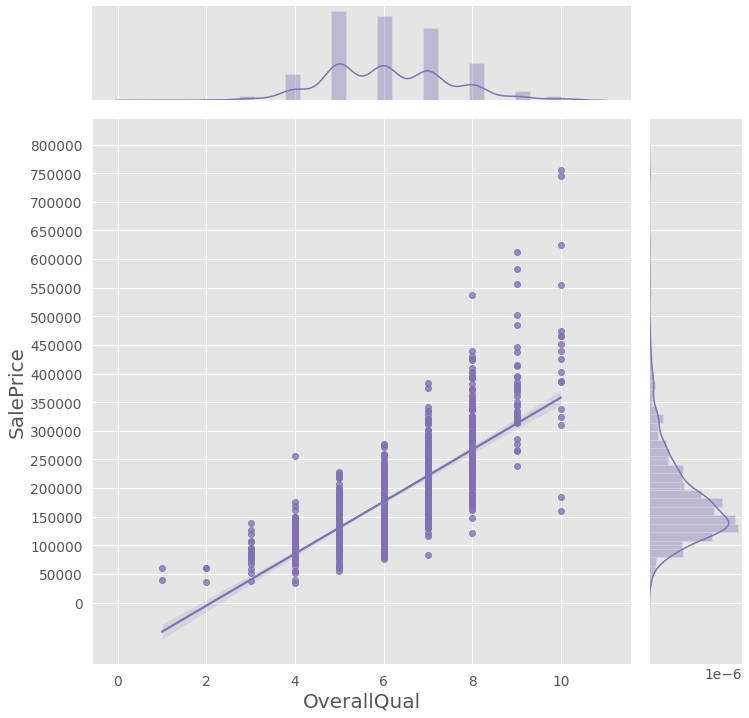

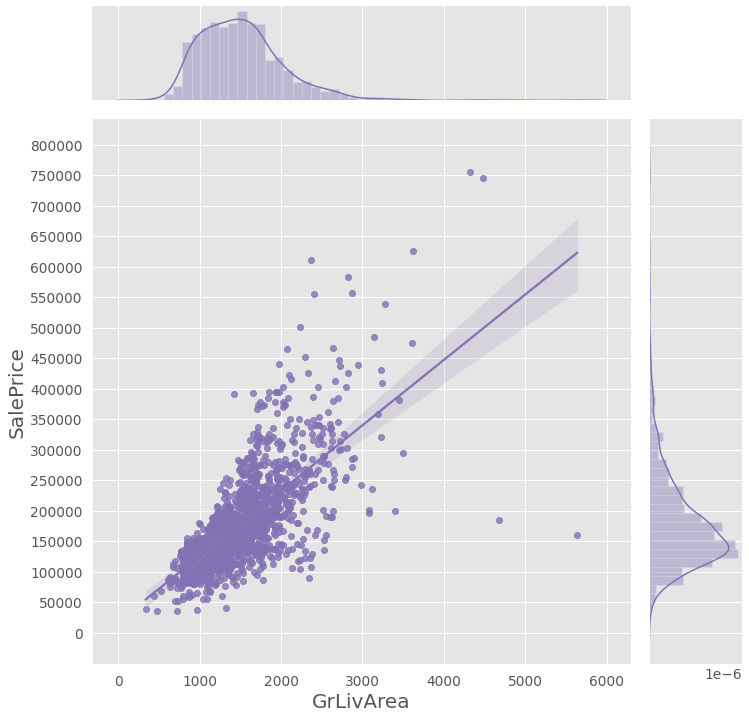

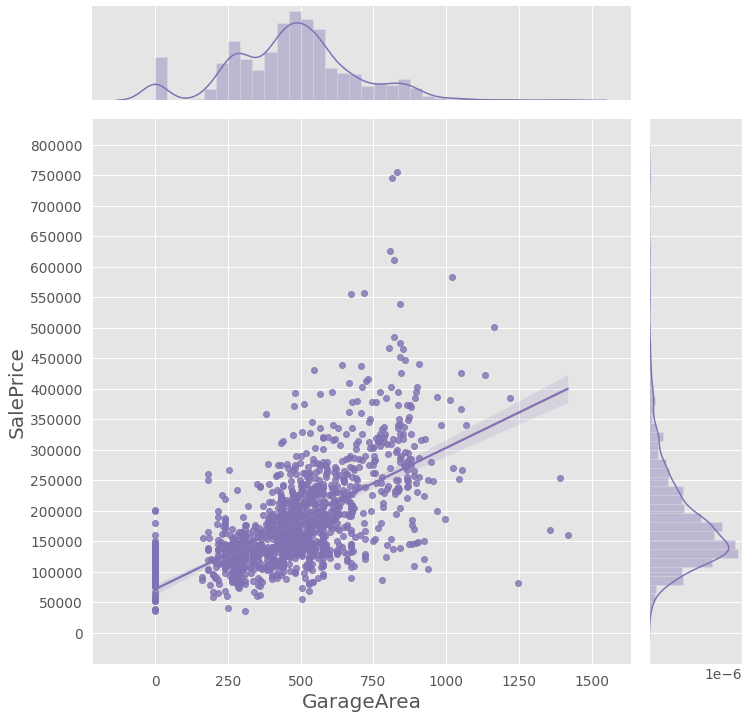

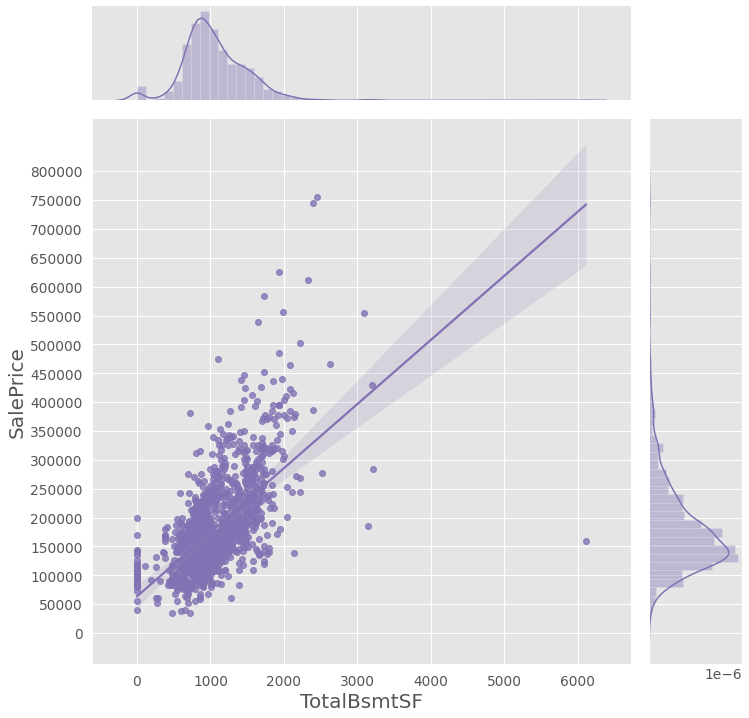

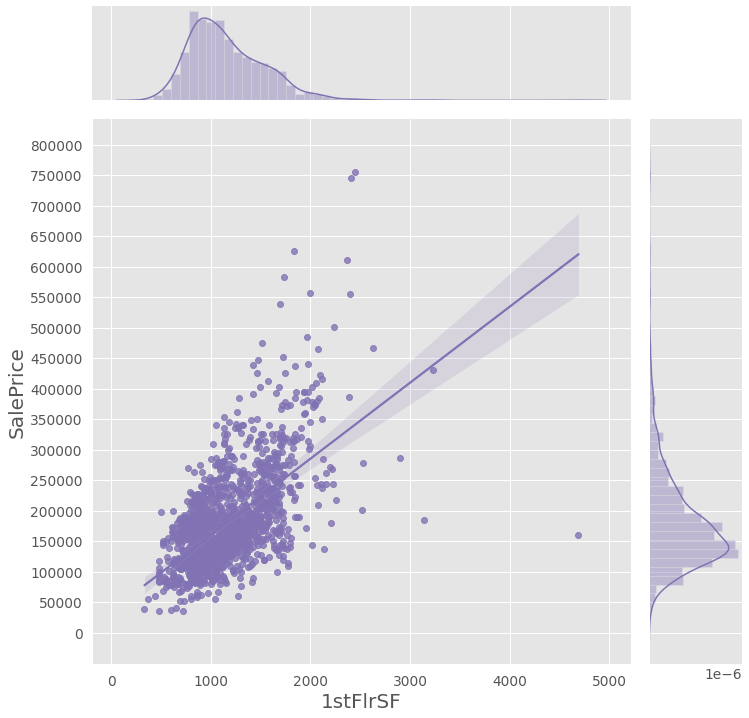

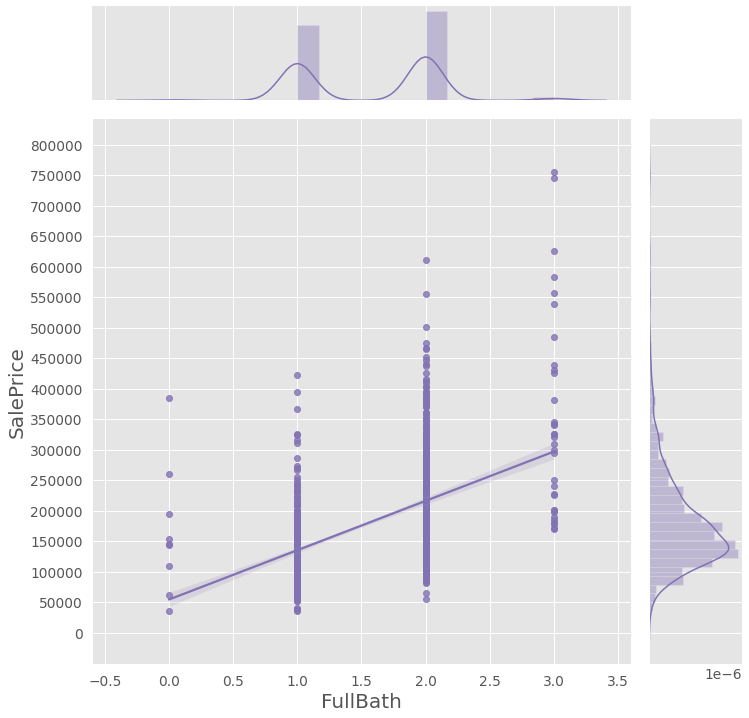

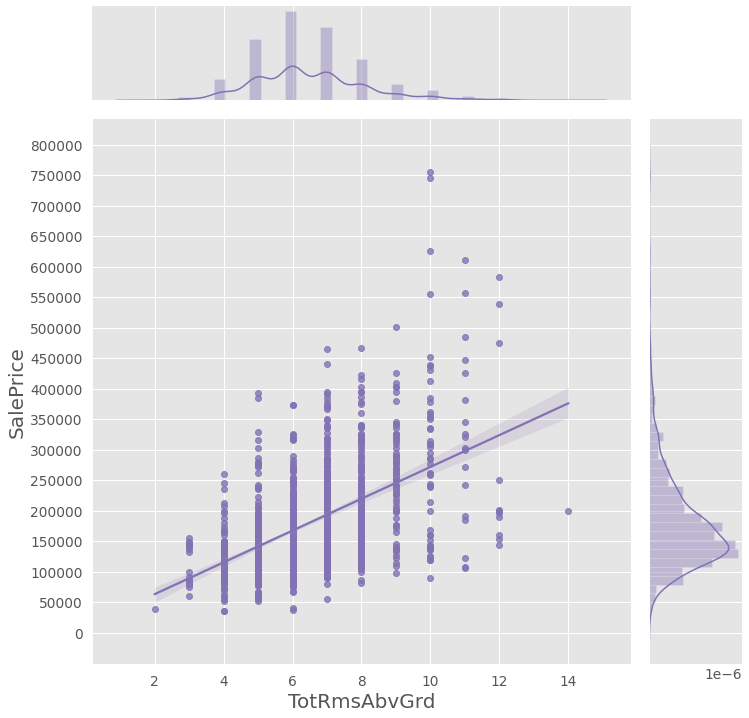

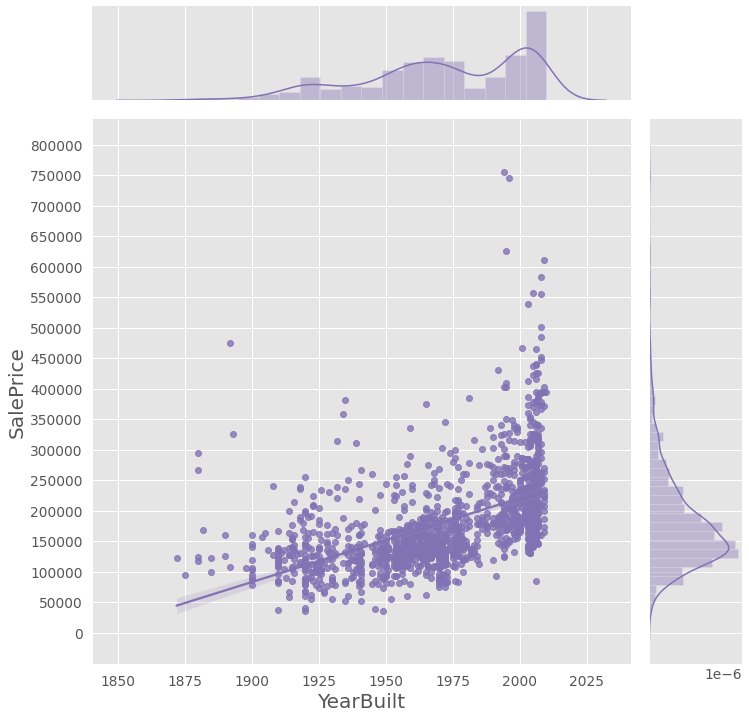

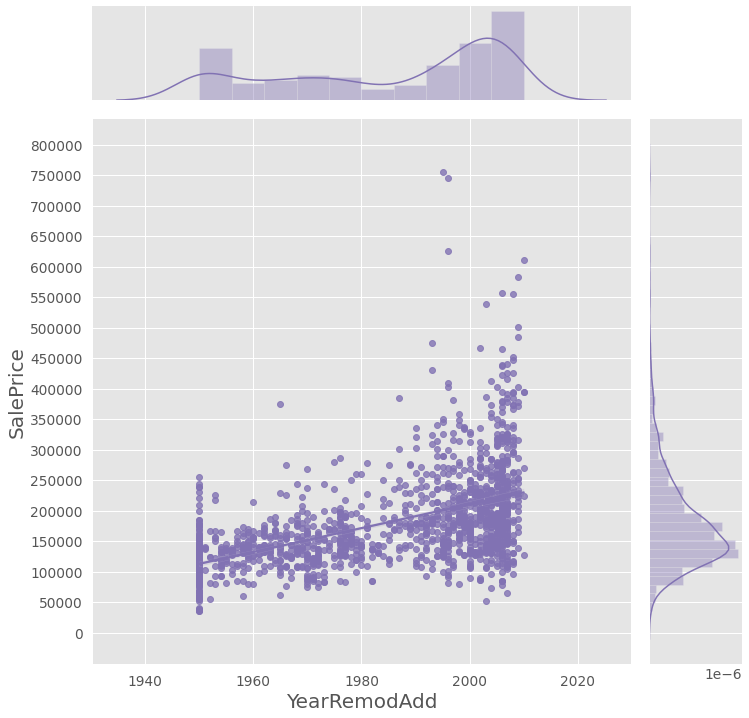

In [30]:
imp_feat=['OverallQual','GrLivArea','GarageArea', 'TotalBsmtSF', '1stFlrSF','FullBath', 'TotRmsAbvGrd', 'YearBuilt', 'YearRemodAdd']

colors=[plt.cm.Set3(each) for each in np.linspace(0, 1, len(imp_feat))]
for i,c in zip(imp_feat,colors):
    plt.style.use('ggplot')
    sns.jointplot(x=i, y="SalePrice", data=train_ds,kind="reg",color='m',height=10)

    plt.xlabel(str(i),fontsize=20)
    plt.yticks(np.arange(0,800001,50000))
    plt.ylabel('SalePrice',fontsize=20)

#**Observation**


> *   Most of the 'TotalBsmtSF' values are zero while the corresponding '1stFlrSF' data has positive values
*   I analysed both the columns to find that they were highly co-related



#Hence, i replaced the zeroes in 'TotalBsmtSF' column to the corresponding values present in '1stFlrSF' column.

In [31]:
train_ds[train_ds['TotalBsmtSF']==0].index

Int64Index([  18,   40,   91,  103,  157,  183,  260,  343,  363,  372,  393,
             521,  533,  534,  554,  647,  706,  737,  750,  779,  869,  895,
             898,  985, 1001, 1012, 1036, 1046, 1049, 1050, 1091, 1180, 1217,
            1219, 1233, 1322, 1413],
           dtype='int64', name='Id')

In [32]:
print(train_ds.iloc[ [ 17,   39,   90,  102,  156,  182,  259,  342,  362,  371,  392,
             520,  532,  533,  553,  646,  705,  736,  749,  778,  868,  894,
             897,  984, 1000, 1011, 1035, 1045, 1048, 1049, 1090, 1179, 1216,
            1218, 1232, 1321, 1412],[37,42]])

      TotalBsmtSF  1stFlrSF
Id                         
18              0      1296
40              0      1152
91              0      1040
103             0      1535
157             0      1040
183             0      1340
260             0       882
343             0      1040
363             0       495
372             0      1120
393             0       882
521             0       694
533             0       827
534             0       334
554             0      1126
647             0      1048
706             0       372
737             0      1040
750             0      1088
779             0      2020
869             0      1547
895             0      1535
898             0      1120
985             0      1302
1001            0       944
1012            0      1664
1036            0       845
1046            0      1733
1049            0      1771
1050            0       930
1091            0      1040
1180            0      1124
1217            0      1318
1219            0   

In [0]:
train_ds.iloc[ [ 17,   39,   90,  102,  156,  182,  259,  342,  362,  371,  392,
             520,  532,  533,  553,  646,  705,  736,  749,  778,  868,  894,
             897,  984, 1000, 1011, 1035, 1045, 1048, 1049, 1090, 1179, 1216,
            1218, 1232, 1321, 1412],[37]]=[None]

In [34]:


print(train_ds.iloc[ [ 17,   39,   90,  102,  156,  182,  259,  342,  362,  371,  392,
             520,  532,  533,  553,  646,  705,  736,  749,  778,  868,  894,
             897,  984, 1000, 1011, 1035, 1045, 1048, 1049, 1090, 1179, 1216,
            1218, 1232, 1321, 1412],[37,42]])

      TotalBsmtSF  1stFlrSF
Id                         
18            NaN      1296
40            NaN      1152
91            NaN      1040
103           NaN      1535
157           NaN      1040
183           NaN      1340
260           NaN       882
343           NaN      1040
363           NaN       495
372           NaN      1120
393           NaN       882
521           NaN       694
533           NaN       827
534           NaN       334
554           NaN      1126
647           NaN      1048
706           NaN       372
737           NaN      1040
750           NaN      1088
779           NaN      2020
869           NaN      1547
895           NaN      1535
898           NaN      1120
985           NaN      1302
1001          NaN       944
1012          NaN      1664
1036          NaN       845
1046          NaN      1733
1049          NaN      1771
1050          NaN       930
1091          NaN      1040
1180          NaN      1124
1217          NaN      1318
1219          NaN   

In [0]:
train_ds['TotalBsmtSF'] = train_ds['TotalBsmtSF'].fillna(train_ds['1stFlrSF'])

In [36]:
print(train_ds.iloc[ [ 17,   39,   90,  102,  156,  182,  259,  342,  362,  371,  392,
             520,  532,  533,  553,  646,  705,  736,  749,  778,  868,  894,
             897,  984, 1000, 1011, 1035, 1045, 1048, 1049, 1090, 1179, 1216,
            1218, 1232, 1321, 1412],[37,42]])

      TotalBsmtSF  1stFlrSF
Id                         
18         1296.0      1296
40         1152.0      1152
91         1040.0      1040
103        1535.0      1535
157        1040.0      1040
183        1340.0      1340
260         882.0       882
343        1040.0      1040
363         495.0       495
372        1120.0      1120
393         882.0       882
521         694.0       694
533         827.0       827
534         334.0       334
554        1126.0      1126
647        1048.0      1048
706         372.0       372
737        1040.0      1040
750        1088.0      1088
779        2020.0      2020
869        1547.0      1547
895        1535.0      1535
898        1120.0      1120
985        1302.0      1302
1001        944.0       944
1012       1664.0      1664
1036        845.0       845
1046       1733.0      1733
1049       1771.0      1771
1050        930.0       930
1091       1040.0      1040
1180       1124.0      1124
1217       1318.0      1318
1219        672.0   

Plotting  TotalBsmtSF AND 1stFlrSF after commiting those changes.

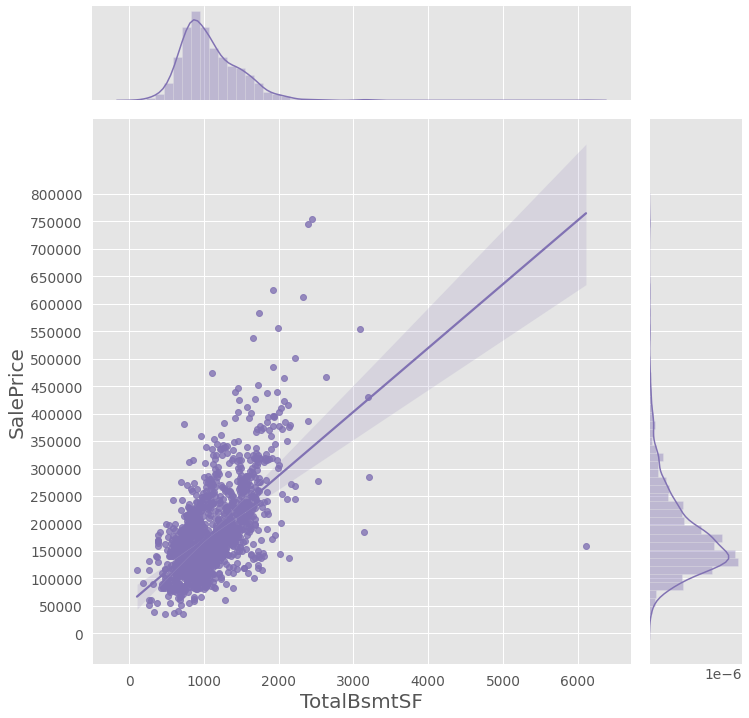

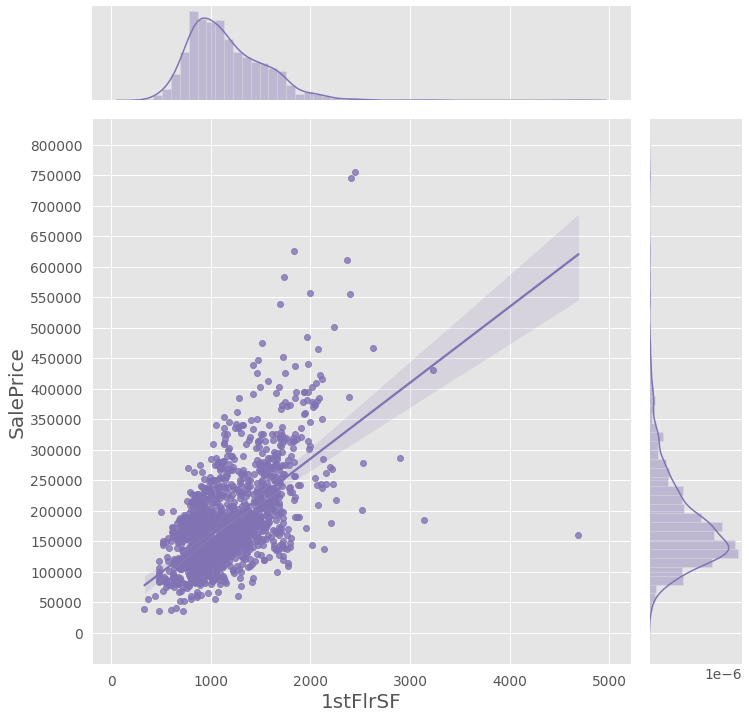

In [37]:
imp_feat2=['TotalBsmtSF', '1stFlrSF']

colors=[plt.cm.Set3(each) for each in np.linspace(0, 1, len(imp_feat))]
for i,c in zip(imp_feat2,colors):
    plt.style.use('ggplot')
    #plt.figure(figsize=(20,16))
    #plt.scatter(x=train[i], y=train["SalePrice"],c=c,alpha=0.7)
    sns.jointplot(x=i, y="SalePrice", data=train_ds,kind="reg",color='m',height=10)
    #sns.regplot(x=train_ds[i], y=train_ds["SalePrice"], color=c,fit_reg=True,marker='o',scatter_kws={'s':50})
    plt.xlabel(str(i),fontsize=20)
    plt.yticks(np.arange(0,800001,50000))
    plt.ylabel('SalePrice',fontsize=20)

**Dropping the Outliers!**

In [0]:
#overall qual
train_ds = train_ds.drop(train_ds[(train_ds.OverallQual==4) & (train_ds.SalePrice>200000)].index)
train_ds = train_ds.drop(train_ds[(train_ds.OverallQual==10) & (train_ds.SalePrice<200000)].index)
train_ds = train_ds.drop(train_ds[(train_ds.OverallQual==8) & (train_ds.SalePrice>500000)].index)

#GrLivArea
train_ds= train_ds.drop(train_ds[(train_ds.GrLivArea>3000) & (train_ds.SalePrice<250000)].index)
train_ds = train_ds.drop(train_ds[(train_ds.GrLivArea<3000) & (train_ds.SalePrice>500000)].index)
train_ds = train_ds.drop(train_ds[(train_ds.GrLivArea<1500) & (train_ds.SalePrice>300000)].index)

#GarageArea
train_ds = train_ds.drop(train_ds[(train_ds.GarageArea>1200) & (train_ds.SalePrice<300000)].index)
train_ds = train_ds.drop(train_ds[(train_ds.GarageArea<1000) & (train_ds.SalePrice>500000)].index)

#TotalBsmtSF

train_ds = train_ds.drop(train_ds[(train_ds.TotalBsmtSF>6000) & (train_ds.SalePrice<200000)].index)
train_ds = train_ds.drop(train_ds[(train_ds.TotalBsmtSF>3000) & (train_ds.SalePrice<300000)].index)

#FullBath
train_ds = train_ds.drop(train_ds[(train_ds.FullBath<1) & (train_ds.SalePrice>250000)].index)

#TotRmsAbvGrd
train_ds = train_ds.drop(train_ds[(train_ds.TotRmsAbvGrd==14) & (train_ds.SalePrice<300000)].index)
train_ds = train_ds.drop(train_ds[(train_ds.TotRmsAbvGrd==10) & (train_ds.SalePrice>700000)].index)
train_ds = train_ds.drop(train_ds[(train_ds.TotRmsAbvGrd==5) & (train_ds.SalePrice>350000)].index)

#YearBuilt
train_ds = train_ds.drop(train_ds[(train_ds.YearBuilt<1950) & (train_ds.SalePrice>350000)].index)
train_ds = train_ds.drop(train_ds[(train_ds.YearBuilt>1950) & (train_ds.SalePrice>500000)].index)

#YearRemodAdd
train_ds = train_ds.drop(train_ds[(train_ds.YearRemodAdd<1970) & (train_ds.SalePrice>200000)].index)
train_ds = train_ds.drop(train_ds[(train_ds.YearRemodAdd<1960) & (train_ds.SalePrice<50000)].index)
train_ds = train_ds.drop(train_ds[(train_ds.YearRemodAdd>1980) & (train_ds.SalePrice>500000)].index)
train_ds = train_ds.drop(train_ds[(train_ds.YearRemodAdd<2000) & (train_ds.SalePrice>400000)].index)



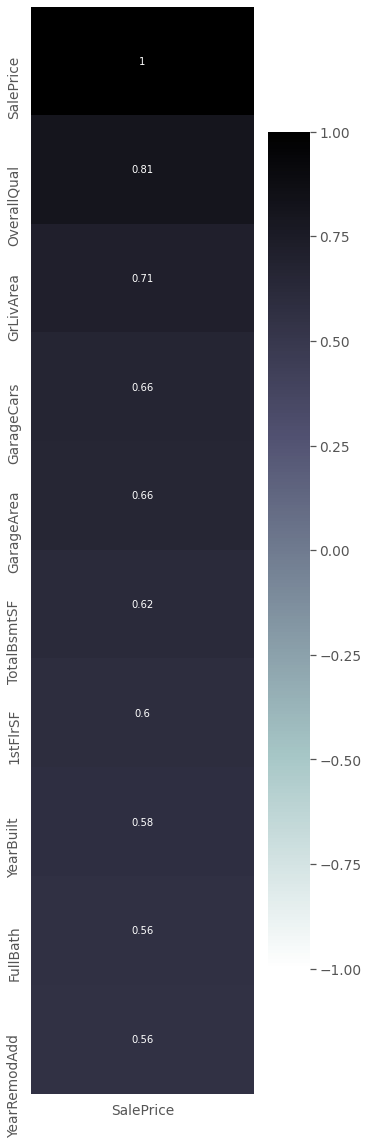

In [39]:
corr1_new_train_ds=train_ds.corr()
plt.figure(figsize=(5,20))
sns.heatmap(corr1_new_train_ds[['SalePrice']].sort_values(by=['SalePrice'],ascending=False).head(10),vmin=-1, cmap='bone_r', annot=True)

Correlations matrix changes  and shows positive results after  

*   removing erroneous value from totalbasementSF 
*   removing Outliers



**IMPUTATIONS**

In [40]:
['OverallQual','GrLivArea','GarageArea', 'TotalBsmtSF', '1stFlrSF','FullBath', 'TotRmsAbvGrd', 'YearBuilt', 'YearRemodAdd']


['OverallQual',
 'GrLivArea',
 'GarageArea',
 'TotalBsmtSF',
 '1stFlrSF',
 'FullBath',
 'TotRmsAbvGrd',
 'YearBuilt',
 'YearRemodAdd']

In [41]:
tt[tt['1stFlrSF'].isnull()]

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,


In [42]:
tt[tt.GarageArea.isnull()]

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2577,70,RM,50.0,9060,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,IDOTRR,Norm,Norm,1Fam,2Story,5,6,1923,1999,Gable,CompShg,Wd Sdng,Plywood,None,0.0,TA,TA,BrkTil,Gd,TA,No,ALQ,548.0,Unf,0.0,311.0,859.0,GasA,Ex,Y,SBrkr,942,886,0,1828,0.0,0.0,2,0,3,1,Gd,6,Typ,0,NaN,Detchd,NaN,NaN,NaN,NaN,NaN,NaN,Y,174,0,212,0,0,0,NaN,MnPrv,NaN,0,3,2007,WD,Alloca,NaN


In [43]:
tt.GarageArea.mean()

472.8745716244003

In [44]:
tt.GarageArea.median()

480.0

In [45]:
tt[tt.TotalBsmtSF.isnull()]

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2121,20,RM,99.0,5940,Pave,NaN,IR1,Lvl,AllPub,FR3,Gtl,BrkSide,Feedr,Norm,1Fam,1Story,4,7,1946,1950,Gable,CompShg,MetalSd,CBlock,None,0.0,TA,TA,PConc,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,GasA,TA,Y,FuseA,896,0,0,896,NaN,NaN,1,0,2,1,TA,4,Typ,0,NaN,Detchd,1946.0,Unf,1.0,280.0,TA,TA,Y,0,0,0,0,0,0,NaN,MnPrv,NaN,0,4,2008,ConLD,Abnorml,NaN


In [46]:

tt.TotalBsmtSF.mean()

1051.7775873886224

In [47]:
tt.TotalBsmtSF.median()

989.5

In [0]:
tt.TotalBsmtSF.fillna(tt.TotalBsmtSF.mean(),inplace=True)

In [0]:
tt.GarageArea.fillna(tt.GarageArea.mean(),inplace=True)

In [50]:
tt[tt.YearRemodAdd.isnull()]

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,


In [51]:
total = train_ds.isnull().sum().sort_values(ascending=False)
percent = (train_ds.isnull().sum()/train_ds.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
PoolQC,1404,0.997868
MiscFeature,1356,0.963753
Alley,1319,0.937456
Fence,1138,0.808813
FireplaceQu,683,0.485430
LotFrontage,247,0.175551
GarageYrBlt,76,0.054016
GarageType,76,0.054016
GarageQual,76,0.054016
GarageFinish,76,0.054016


In [52]:
#dealing with missing data
train_ds = train_ds.drop((missing_data[missing_data['Total'] > 1]).index,1)
train_ds = train_ds.drop(train_ds.loc[train_ds['Electrical'].isnull()].index)
train_ds.isnull().sum().max() 

0

In [53]:
train_ds.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1406 entries, 1 to 1460
Data columns (total 63 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   MSSubClass               1406 non-null   int64  
 1   MSZoning                 1406 non-null   object 
 2   LotArea                  1406 non-null   int64  
 3   Street                   1406 non-null   object 
 4   LotShape                 1406 non-null   object 
 5   LandContour              1406 non-null   object 
 6   Utilities                1406 non-null   object 
 7   LotConfig                1406 non-null   object 
 8   LandSlope                1406 non-null   object 
 9   Neighborhood             1406 non-null   object 
 10  Condition1               1406 non-null   object 
 11  Condition2               1406 non-null   object 
 12  BldgType                 1406 non-null   object 
 13  HouseStyle               1406 non-null   object 
 14  OverallQual             

In [54]:
test_ds[[ 'OverallQual','GrLivArea','GarageArea', 'TotalBsmtSF','FullBath', 'TotRmsAbvGrd', 'YearBuilt']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1459 entries, 1461 to 2919
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   OverallQual   1459 non-null   int64  
 1   GrLivArea     1459 non-null   int64  
 2   GarageArea    1458 non-null   float64
 3   TotalBsmtSF   1458 non-null   float64
 4   FullBath      1459 non-null   int64  
 5   TotRmsAbvGrd  1459 non-null   int64  
 6   YearBuilt     1459 non-null   int64  
dtypes: float64(2), int64(5)
memory usage: 91.2 KB


In [55]:
test_ds[test_ds.GarageArea.isnull()]

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2577,70,RM,50.0,9060,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,IDOTRR,Norm,Norm,1Fam,2Story,5,6,1923,1999,Gable,CompShg,Wd Sdng,Plywood,None,0.0,TA,TA,BrkTil,Gd,TA,No,ALQ,548.0,Unf,0.0,311.0,859.0,GasA,Ex,Y,SBrkr,942,886,0,1828,0.0,0.0,2,0,3,1,Gd,6,Typ,0,NaN,Detchd,NaN,NaN,NaN,NaN,NaN,NaN,Y,174,0,212,0,0,0,NaN,MnPrv,NaN,0,3,2007,WD,Alloca


In [56]:
test_ds[test_ds.TotalBsmtSF   .isnull()]

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2121,20,RM,99.0,5940,Pave,NaN,IR1,Lvl,AllPub,FR3,Gtl,BrkSide,Feedr,Norm,1Fam,1Story,4,7,1946,1950,Gable,CompShg,MetalSd,CBlock,None,0.0,TA,TA,PConc,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,GasA,TA,Y,FuseA,896,0,0,896,NaN,NaN,1,0,2,1,TA,4,Typ,0,NaN,Detchd,1946.0,Unf,1.0,280.0,TA,TA,Y,0,0,0,0,0,0,NaN,MnPrv,NaN,0,4,2008,ConLD,Abnorml


In [57]:
test_ds.GarageArea.mean()

472.76886145404666

In [58]:
test_ds.TotalBsmtSF.mean()

1046.1179698216736

In [59]:
test_ds.GarageArea.median()

480.0

In [60]:
test_ds.TotalBsmtSF.median()

988.0

In [0]:
test_ds.GarageArea.fillna(test_ds.GarageArea.mean(),inplace=True)

In [0]:
test_ds.TotalBsmtSF.fillna(test_ds.TotalBsmtSF.mean(),inplace=True)

In [63]:
test_ds[test_ds.GarageArea.isnull()]

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,


In [64]:
test_ds[test_ds.TotalBsmtSF   .isnull()]

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,




---



#**Modelling**

---



###Model 1-Linear regression 

In [0]:
X = train_ds[[ 'OverallQual','GrLivArea','GarageArea', 'TotalBsmtSF','FullBath', 'TotRmsAbvGrd', 'YearBuilt']].values
y = train_ds['SalePrice'].values

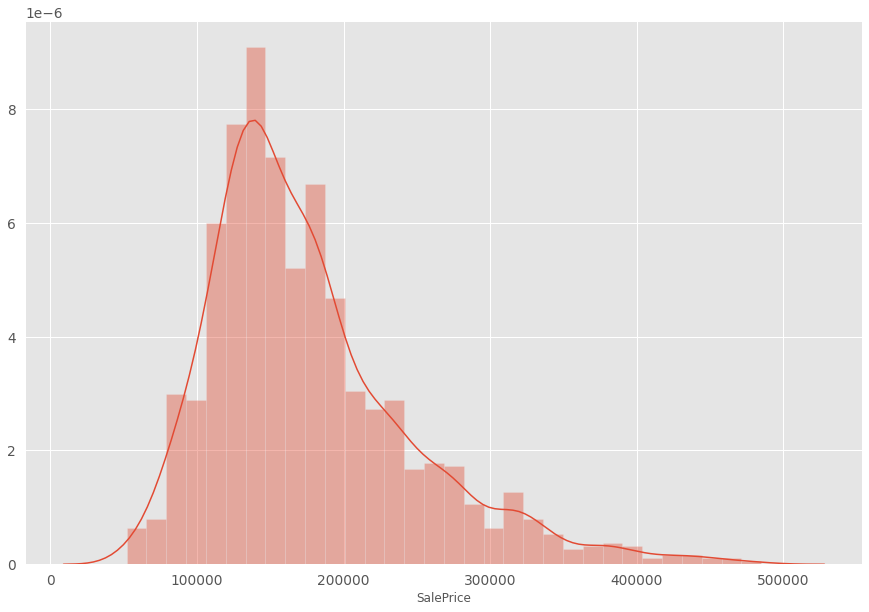

In [66]:
plt.figure(figsize=(15,10))
plt.tight_layout()
sns.distplot(train_ds['SalePrice'])

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


In [68]:
mymodel = LinearRegression()  
mymodel.fit(X_train, y_train)



LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [0]:
coeff_df = pd.DataFrame(mymodel.coef_,[ 'OverallQual','GrLivArea','GarageArea', 'TotalBsmtSF','FullBath', 'TotRmsAbvGrd', 'YearBuilt'], columns=['Coefficient'])


In [70]:
coeff_df

,Coefficient
OverallQual,18941.282462
GrLivArea,59.666713
GarageArea,46.230687
TotalBsmtSF,35.322037
FullBath,-9033.004081
TotRmsAbvGrd,-1486.065457
YearBuilt,394.788791


In [0]:
y_pred = mymodel.predict(X_test)


In [0]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})


In [73]:
df.head(25)

,Actual,Predicted
0,128500,131447.597559
1,242000,262296.885792
2,89500,122200.421259
3,82500,203130.444568
4,139000,161598.512090
5,212000,205091.458509
6,175000,183133.353759
7,131500,156849.193705
8,161500,170121.627291
9,173000,186633.242762


In [0]:
df1=df.head(25)

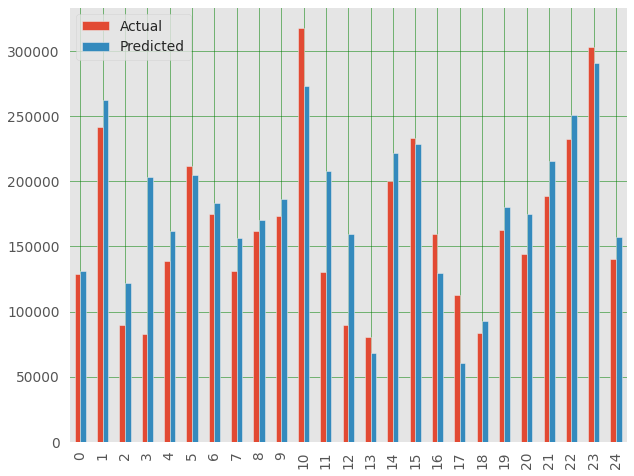

In [75]:
df1.plot(kind='bar',figsize=(10,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

In [76]:

print('Variance score: {}'.format(mymodel.score(X_test, y_test))) 

Variance score: 0.8265055344644846


In [77]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.8265055344644846

In [78]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))


Mean Absolute Error: 22249.00555485403
Mean Squared Error: 899576791.9693041
Root Mean Squared Error: 29992.945703436733


root mean square value is close to 20% of the actual mean ..so pretty wrong model!

---



**Predictiong the value on test data**

In [0]:
#train data for reference
#X = train_ds[[ 'OverallQual','GrLivArea','GarageArea', 'TotalBsmtSF','FullBath', 'TotRmsAbvGrd', 'YearBuilt']].values
#y = train_ds['SalePrice'].values

test_ds_X =test_ds[[ 'OverallQual','GrLivArea','GarageArea', 'TotalBsmtSF','FullBath', 'TotRmsAbvGrd', 'YearBuilt']].values
predicted_prices = mymodel.predict(test_ds_X)


In [80]:
print(predicted_prices)

[129518.57256371 168089.63330921 167107.20358602 ... 150682.94552455
 111997.55624804 231257.42137263]


#Model 2 -Ridge Regression 

---



In [0]:
from sklearn import linear_model
mymodel2 = linear_model.Ridge(alpha=.5)
mymodel2.fit(X_train, y_train)
coeff_df2 = pd.DataFrame(mymodel.coef_,[ 'OverallQual','GrLivArea','GarageArea', 'TotalBsmtSF','FullBath', 'TotRmsAbvGrd', 'YearBuilt'], columns=['Coefficient'])
coeff_df2



,Coefficient
OverallQual,18941.282462
GrLivArea,59.666713
GarageArea,46.230687
TotalBsmtSF,35.322037
FullBath,-9033.004081
TotRmsAbvGrd,-1486.065457
YearBuilt,394.788791


In [0]:
y_pred2 = mymodel2.predict(X_test)

In [0]:
df2 = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred2})
df2.head(25)

,Actual,Predicted
0,128500,131447.864685
1,242000,262286.803265
2,89500,122182.179069
3,82500,203137.110043
4,139000,161603.640054
5,212000,205093.858501
6,175000,183134.538961
7,131500,156873.063909
8,161500,170138.182149
9,173000,186647.279323


In [0]:
intercept_model2=mymodel2.intercept_

In [0]:
print(mymodel2.intercept_)

-841218.2977051868


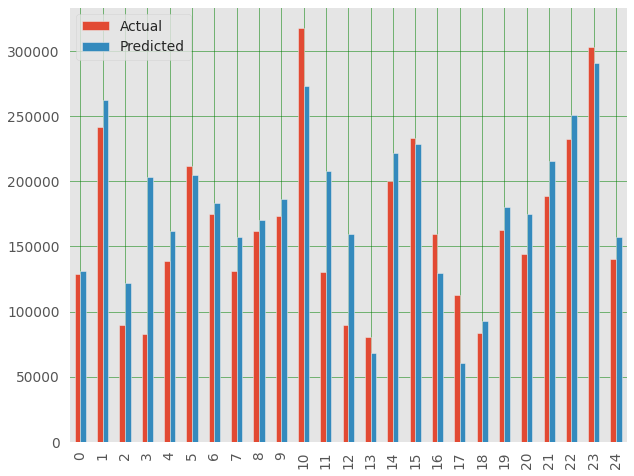

In [0]:
df_2=df2.head(25)
[463]
df_2.plot(kind='bar',figsize=(10,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

In [0]:
print('Variance score: {}'.format(mymodel2.score(X_test, y_test))) 

Variance score: 0.8264939470175705


In [0]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred2))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred2))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred2)))

Mean Absolute Error: 22249.593804935022
Mean Squared Error: 899636873.4150723
Root Mean Squared Error: 29993.947279660813


# Submission 

In [0]:
my_submission = pd.DataFrame({'Id': test_ds.index, 'SalePrice': predicted_prices})
my_submission.to_csv('submission.csv', index=False)

In [84]:
print(my_submission)
#X = train_ds[['OverallQual','OverallCond','YearBuilt','YearRemodAdd','BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','TotalBsmtSF',  '1stFlrSF','2ndFlrSF','LowQualFinSF','GrLivArea','BsmtFullBath','BsmtHalfBath','FullBath','HalfBath','BedroomAbvGr','KitchenAbvGr','WoodDeckSF','OpenPorchSF,'EnclosedPorch','3SsnPorch','ScreenPorch','PoolArea','MiscVal','MoSold','YrSold']].values
#y = train_ds['SalePrice'].values

        Id      SalePrice
0     1461  129518.572564
1     1462  168089.633309
2     1463  167107.203586
3     1464  182840.129241
4     1465  216162.382962
...    ...            ...
1454  2915   80208.459456
1455  2916   91944.370374
1456  2917  150682.945525
1457  2918  111997.556248
1458  2919  231257.421373

[1459 rows x 2 columns]


In [0]:
from google.colab import files
files.download("submission.csv")